Reading: 54380 tracks, 11107 albums, 3517 artists


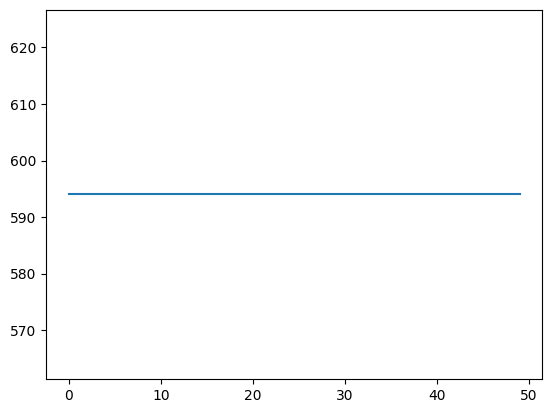

100%|██████████| 11057/11057 [00:00<00:00, 502578.32it/s]


Min Samples per Genre: 594
Max Samples per Genre: 594
 Standard Deviation: 0.0
 Mean: 594.0
Tracks in Total: 11057


100%|██████████| 11057/11057 [00:00<00:00, 13131.84it/s]


In [1]:
from data.processing import ParseBalanced

subset_name = "autotagging_top50tags"
subset_file = f"E:/mtg-jamendo-dataset/data/{subset_name}.tsv"
data_directory = "E:/mtg-jamendo/"
output_directory = f"D:/SongsDataset/melspec-mtg-jamendo"
subset_data = f'E:/mtg-jamendo-dataset/stats/{subset_name}/all.tsv'

ParseBalanced(subset_file, subset_data, data_directory, output_directory)

In [1]:
from utils.Config import Config
from data.data_utils import *

data_directory = "E:/mtg-jamendo/"
subset_file_name = "autotagging_top50tags"
prefetch_factor = 1

model_name = "Myna-CLS-2D-ALIBI"
config = Config(
        save_path=f"trained_models\\{model_name}\\",
        num_epochs=8,
        learning_rate=2e-4,
        weight_decay=1e-4,
        num_workers=2,
        batch_size= 32,
        eval_batch_size=32,
        dtype=torch.float32
    )

In [2]:
from torch.utils.data import DataLoader

train_dataset = StreamViewDataset(f"D:\\SongsDataset\\melspec-mtg-jamendo\\train_set\\", chunk_size=256, views=2)
test_dataset  = StreamViewDataset(f"D:\\SongsDataset\\melspec-mtg-jamendo\\test_set\\", chunk_size=256, views=2)

random_indicies = np.random.permutation(len(train_dataset))
n_fold = random_indicies[:1024]
train_dataset = torch.utils.data.Subset(train_dataset, n_fold)

random_indicies = np.random.permutation(len(test_dataset))
n_fold = random_indicies[:256]
test_dataset = torch.utils.data.Subset(test_dataset, n_fold)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    # num_workers=config.num_workers,
    # prefetch_factor=prefetch_factor,
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    # num_workers=config.num_workers,
    # prefetch_factor=prefetch_factor,
)

In [ ]:
from utils import misc
from models.Myna import Myna
from training.contrastive_training import train_contrastive

model = Myna(
    image_size=(128, 256),
    channels=1,
    patch_size=(16, 16),
    latent_space=128,
    d_model=384,
    depth=12,
    heads=6,
    mlp_dim=1536,
    mask_ratio=0.9,
    use_cls=True,
    positional_encoding="2D-ALIBI"
)

model_name = "Myna-CLS-2D-ALIBI"
config = Config(
        save_path=f"trained_models\\{model_name}\\",
        num_epochs=64,
        learning_rate=2e-4,
        weight_decay=1e-4,
        num_workers=config.num_workers,
        batch_size=config.batch_size,
        eval_batch_size=config.batch_size,
        dtype=torch.float32
    )

print(f"{misc.model_size(model)} Parameters")
train_contrastive(model, test_dataloader, train_dataloader, config, convex=False, start_epoch=0, views=2)

21425536 Parameters


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
from utils import misc
from models.Myna import Myna
from training.contrastive_training import train_contrastive

model = Myna(
    image_size=(128, 256),
    channels=1,
    patch_size=(16, 16),
    latent_space=128,
    d_model=384,
    depth=12,
    heads=6,
    mlp_dim=1536,
    mask_ratio=0.9,
    use_cls=True,
    positional_encoding="sinusoidal"
)

model_name = "Myna-CLS-Sinusoidal"
config = Config(
        save_path=f"trained_models\\{model_name}\\",
        num_epochs=64,
        learning_rate=2e-4,
        weight_decay=1e-4,
        num_workers=2,
        batch_size= 256,
        eval_batch_size=484,
        dtype=torch.float32
    )

print(f"{misc.model_size(model)} Parameters")
train_contrastive(model, test_dataloader, train_dataloader, config, convex=False, start_epoch=0, views=2)

In [3]:
from training.contrastive_training import evaluate_contrastive

model = torch.load("E:\\Coding\\SongAnalyzer\\Analyzer\\src\\trained_models\\Myna-CLS-ALIBI\\Epoch-103.pt", weights_only=False)
model.mask_ratio = 0.0
same_song_contrastive_loss = evaluate_contrastive(model, test_dataloader, Config, test_masked=False)
print(same_song_contrastive_loss)

  0%|          | 0/3 [00:00<?, ?it/s]

2.8604929447174072


In [4]:
from training.contrastive_training import evaluate_contrastive

model = torch.load("E:\\Coding\\SongAnalyzer\\Analyzer\\src\\trained_models\\Myna-CLS-Sinusoidal\\Epoch-96.pt", weights_only=False)
model.mask_ratio = 0.0
same_song_contrastive_loss = evaluate_contrastive(model, test_dataloader, Config, test_masked=False)
print(same_song_contrastive_loss)

  0%|          | 0/3 [00:00<?, ?it/s]

2.715553879737854


In [7]:
from utils import misc
from models.Myna import Myna
from training.contrastive_training import train_contrastive

model = Myna(
    image_size=(128, 256),
    channels=1,
    patch_size=(16, 16),
    latent_space=128,
    d_model=384,
    depth=12,
    heads=6,
    mlp_dim=1536,
    mask_ratio=0.9,
    use_cls=True,
    positional_encoding="Sinusoidal"
)

print(f"{misc.model_size(model)} Parameters")
train_contrastive(model, test_dataloader, train_dataloader, Config, convex=False, start_epoch=14, views=2)

21425536 Parameters


  0%|          | 0/21 [00:04<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
from training.contrastive_training import evaluate_contrastive

model.mask_ratio = 0.25
same_song_contrastive_loss = evaluate_contrastive(model, test_dataloader, Config, test_masked=False)
print(same_song_contrastive_loss)

In [ ]:
from training.contrastive_training import evaluate_contrastive

model.mask_ratio = 0.0
same_song_contrastive_loss = evaluate_contrastive(model, test_dataloader, Config, test_masked=False)
print(same_song_contrastive_loss)

In [ ]:
from training.autoencoding_training import train_autoencode
train_autoencode(model, test_dataloader, train_dataloader, Config, show_graph=False)